Que-1 : Implement global thresholding with different threshold values and observe the changes.

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [19]:
# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/Computer Vision/Sample.jpg', cv2.IMREAD_GRAYSCALE)

In [20]:
# List of threshold values to try
threshold_values = [50, 100, 127, 150, 200]


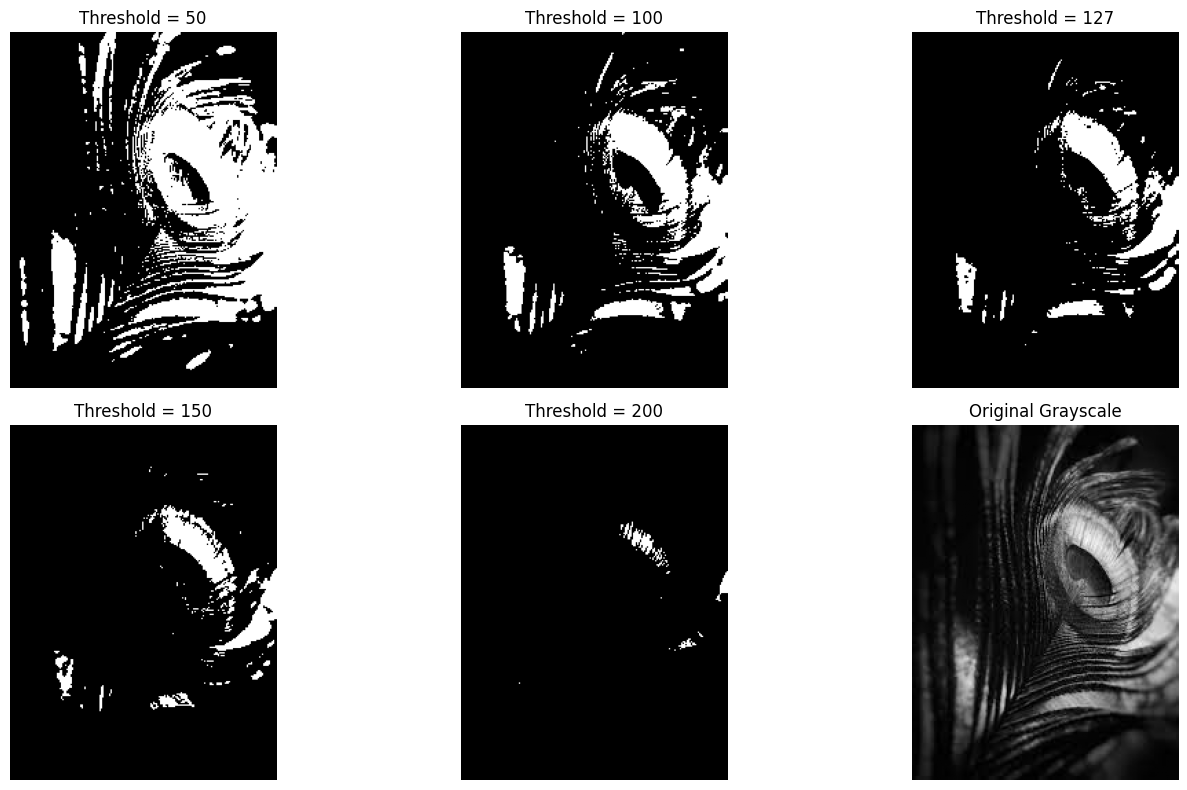

In [21]:
# Create a figure to display results
plt.figure(figsize=(15, 8))
# Apply thresholding with each value
for i, thresh in enumerate(threshold_values):
    _, thresholded = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)

    # Display the result
    plt.subplot(2, 3, i+1)
    plt.imshow(thresholded, cmap='gray')
    plt.title(f"Threshold = {thresh}")
    plt.axis('off')

# Show original image
plt.subplot(2, 3, 6)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.tight_layout()
plt.show()


Que-2 : Use adaptive thresholding with different block sizes and constant values.

In [22]:
# Parameters to test
block_sizes = [11, 15, 21]      # Must be odd and > 1
constant_values = [2, 5, 10]    # Subtracted from mean/gaussian


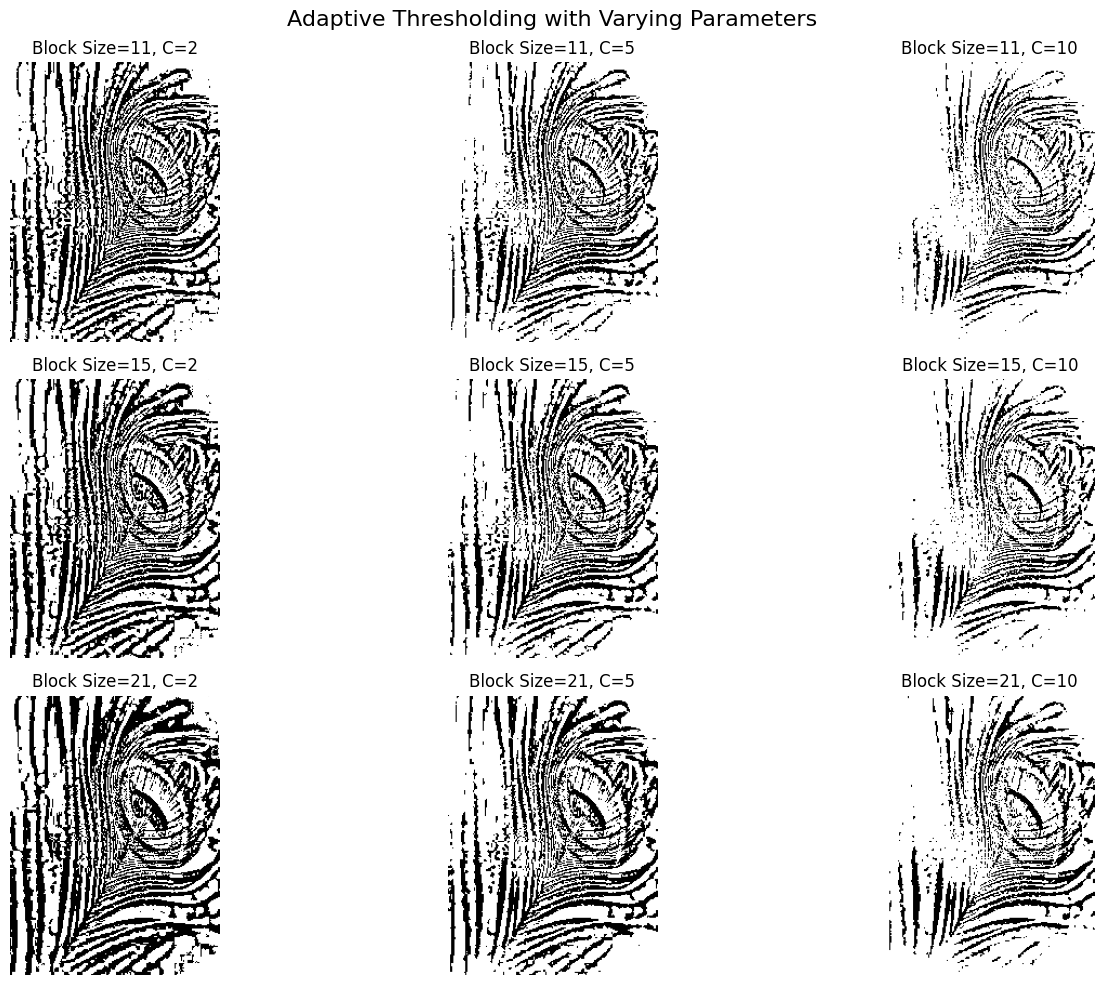

In [23]:
# Create a plot
plt.figure(figsize=(15, 10))
count = 1

# Try combinations of block sizes and constants
for b_size in block_sizes:
    for c in constant_values:
        thresh_img = cv2.adaptiveThreshold(
            image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # You can try ADAPTIVE_THRESH_MEAN_C too
            cv2.THRESH_BINARY, blockSize=b_size, C=c
        )

        # Show result
        plt.subplot(len(block_sizes), len(constant_values), count)
        plt.imshow(thresh_img, cmap='gray')
        plt.title(f'Block Size={b_size}, C={c}')
        plt.axis('off')
        count += 1

plt.suptitle('Adaptive Thresholding with Varying Parameters', fontsize=16)
plt.tight_layout()
plt.show()

Que-3 : Visualize the histogram before applying Otsu's thresholding.

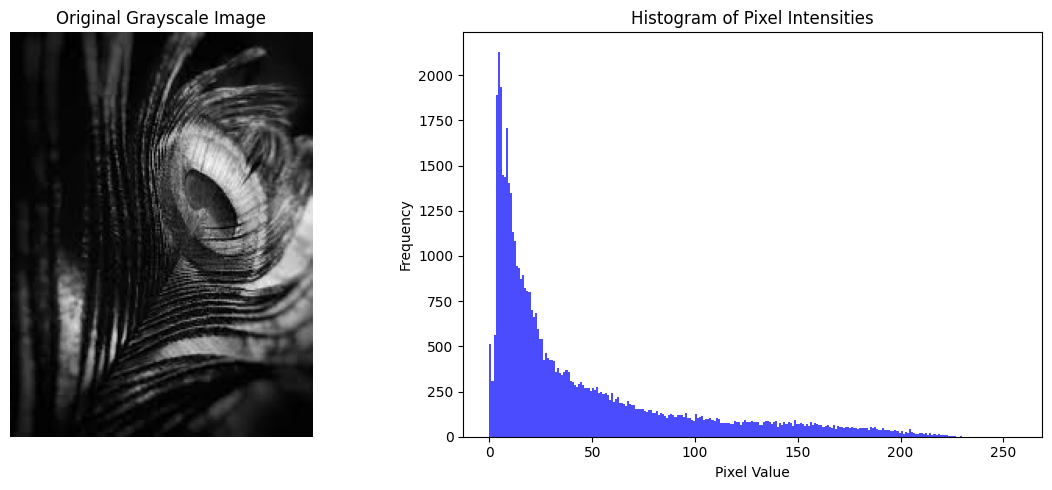

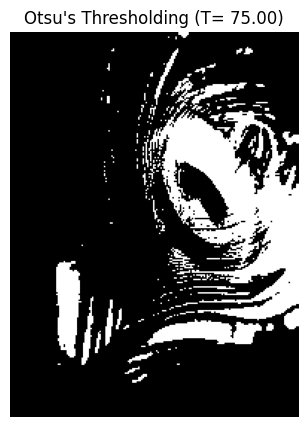

In [24]:
# Plot original grayscale image
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Plot the histogram of pixel intensities
plt.subplot(1, 2, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Apply Otsu's Thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Show Otsu result
plt.figure(figsize=(6, 5))
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu's Thresholding (T={_: .2f})")
plt.axis('off')
plt.show()

Que-4 : Combine Otsu's method with Gaussian filtering and observe improvements.

In [25]:
# Apply Otsu's thresholding directly
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


In [26]:
# Apply Gaussian Blur first
blurred = cv2.GaussianBlur(image, (5, 5), 0)

In [27]:
# Then apply Otsu's thresholding on the blurred image
_, otsu_gauss_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


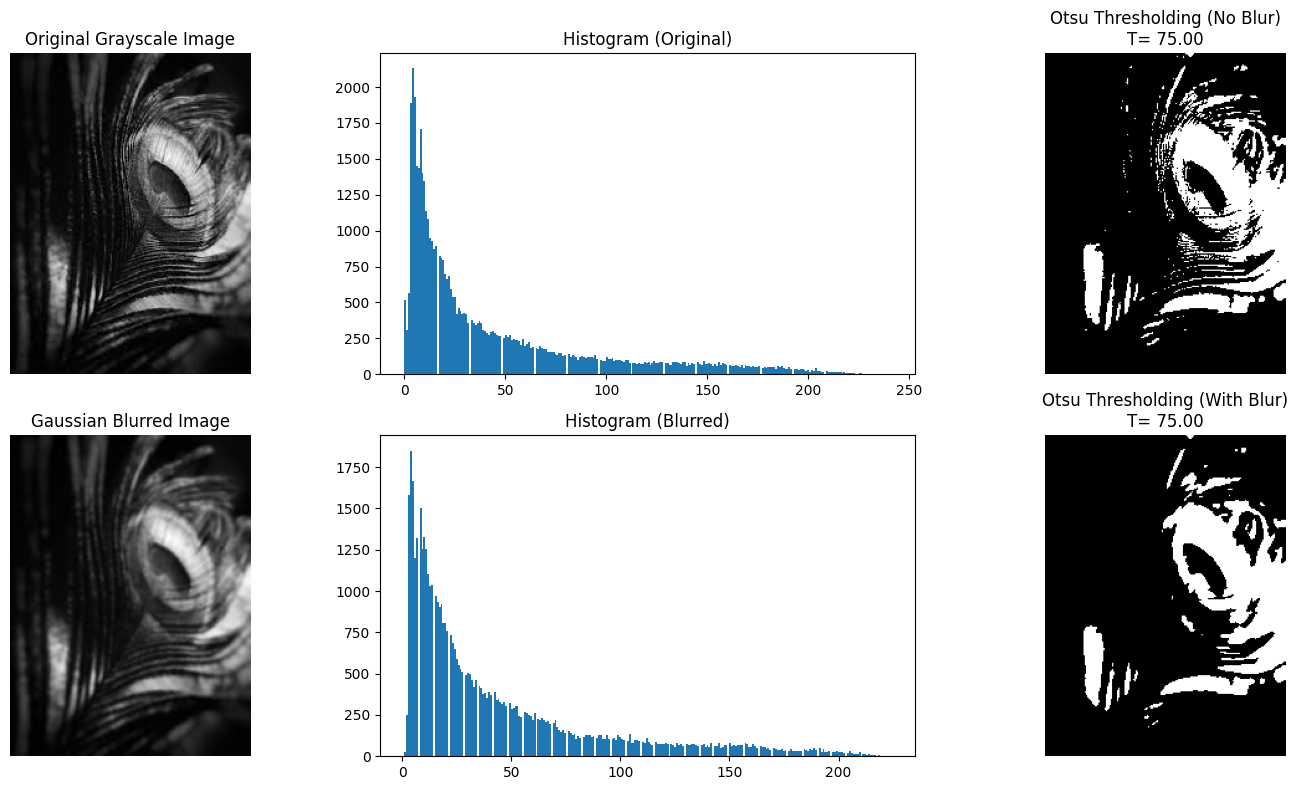

In [28]:
# Plot original, histogram, and results
plt.figure(figsize=(16, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Histogram of original
plt.subplot(2, 3, 2)
plt.hist(image.ravel(), 256)
plt.title('Histogram (Original)')

# Otsu without blur
plt.subplot(2, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu Thresholding (No Blur)\nT={_: .2f}")
plt.axis('off')

# Blurred image
plt.subplot(2, 3, 4)
plt.imshow(blurred, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')

# Histogram of blurred
plt.subplot(2, 3, 5)
plt.hist(blurred.ravel(), 256)
plt.title('Histogram (Blurred)')

# Otsu with blur
plt.subplot(2, 3, 6)
plt.imshow(otsu_gauss_thresh, cmap='gray')
plt.title(f"Otsu Thresholding (With Blur)\nT={_: .2f}")
plt.axis('off')

plt.tight_layout()
plt.show()

Que-5 : Perform thresholding on noisy images and compare results.

In [29]:
# Function to add Gaussian noise
def add_gaussian_noise(img, mean=0, var=10):
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
    noisy = cv2.add(img, gauss)
    return noisy

# Add noise to the image
noisy_image = add_gaussian_noise(image)

In [31]:
# 1. Simple thresholding
_, simple_thresh = cv2.threshold(noisy_image, 127, 255, cv2.THRESH_BINARY)

In [32]:
# 2. Otsu's thresholding directly on noisy image
_, otsu_thresh = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [33]:
# 3. Apply Gaussian blur before Otsu
blurred = cv2.GaussianBlur(noisy_image, (5, 5), 0)
_, otsu_blur_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

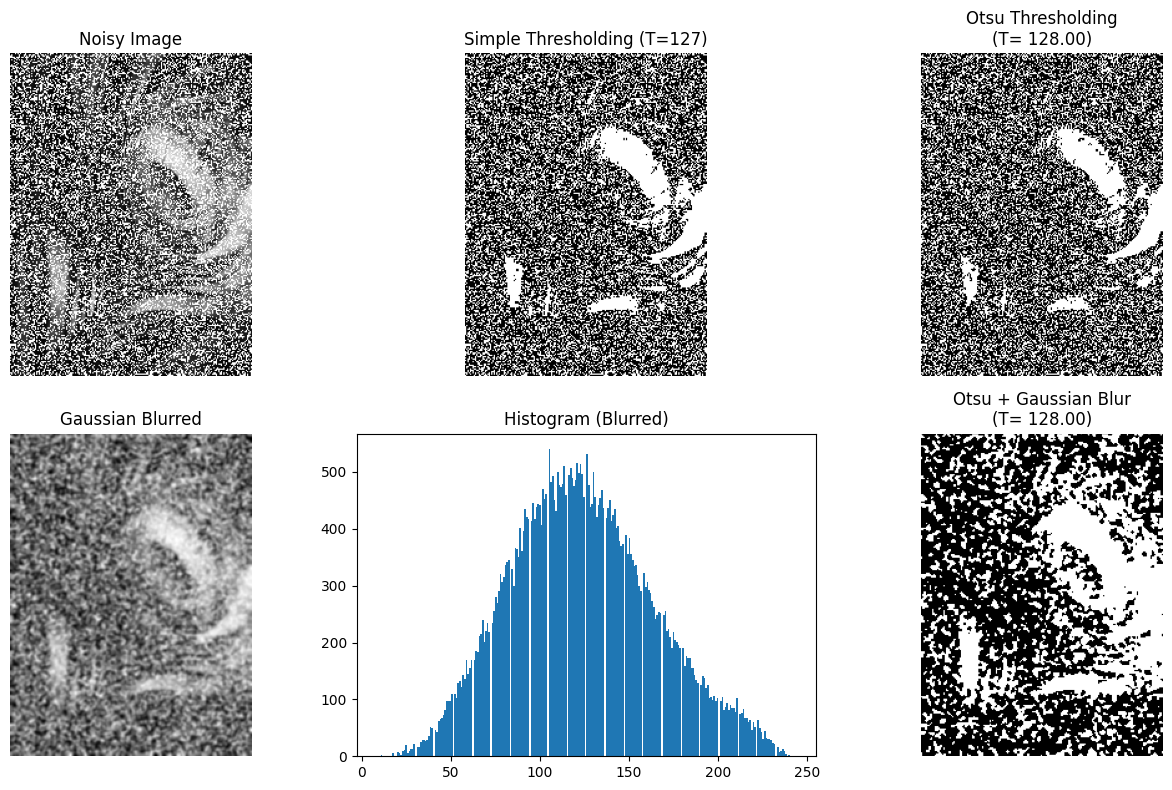

In [34]:
# Plot all results
plt.figure(figsize=(14, 8))

# Original noisy image
plt.subplot(2, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

# Simple Thresholding
plt.subplot(2, 3, 2)
plt.imshow(simple_thresh, cmap='gray')
plt.title("Simple Thresholding (T=127)")
plt.axis('off')

# Otsu on noisy
plt.subplot(2, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu Thresholding\n(T={_: .2f})")
plt.axis('off')

# Blurred image
plt.subplot(2, 3, 4)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis('off')

# Histogram of blurred
plt.subplot(2, 3, 5)
plt.hist(blurred.ravel(), bins=256)
plt.title("Histogram (Blurred)")

# Otsu after blur
plt.subplot(2, 3, 6)
plt.imshow(otsu_blur_thresh, cmap='gray')
plt.title(f"Otsu + Gaussian Blur\n(T={_: .2f})")
plt.axis('off')

plt.tight_layout()
plt.show()